In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Libraries

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import Adam, RMSprop
import optuna

# Training data

In [3]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train_data.shape

(42000, 785)

In [4]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = train_data.drop('label',axis=1)
y = train_data[['label']]

In [6]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y.head()

,label
0,1
1,0
2,1
3,4
4,0


In [8]:
y.shape

(42000, 1)

In [9]:
y = to_categorical(y)

In [10]:
y.shape

(42000, 10)

In [11]:
y[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
y[3]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [14]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3053,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30071,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35662,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7969,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16537,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [17]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [18]:
X.max().unique()

array([  0, 116, 254, 216,   9,  16,  47, 157, 255, 243, 244, 184, 197,
        64,  29, 134, 128, 234, 165, 141,  84, 139, 164, 121,  38,  51,
       114, 226, 230,  95, 253,  18,   4, 177, 196,  53, 190, 220, 150,
       112, 163, 252, 110,  32, 247, 188, 209, 223,  71,  60, 126, 151,
       178,  50, 107, 251,  39,  31,  10, 225,  72, 217, 241,  98,  42,
       127, 104,  28,  59, 231,  62])

In [19]:
X.min().unique()

array([0])

# Scaling

In [20]:
X_train=X_train/255
X_test=X_test/255

In [21]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
21028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Reshaping

In [23]:

X_train = X_train.values.reshape( -1 , 28 , 28 , 1)
X_test = X_test.values.reshape( -1 , 28 , 28 , 1)

In [24]:
X_train.shape

(33600, 28, 28, 1)

In [25]:
X_test.shape

(8400, 28, 28, 1)

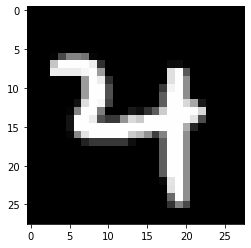

In [26]:
plt.imshow(X_train[10],cmap='gray')

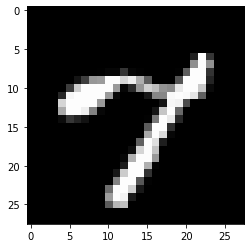

In [27]:
plt.imshow(X_train[100],cmap='gray')

# Model

In [28]:
#Sequential API
model = Sequential()
#Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())    
model.add(Dense(128,activation='relu'))
#output layer multiclass hence softmax layer
model.add(Dense(10,activation='softmax'))


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [30]:
early_stop = EarlyStopping(monitor='value_loss',patience=1)

In [31]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stop])

2021-11-25 03:04:29.965215: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1050/1050 [==============================] - 8s 7ms/step - loss: 0.1916 - accuracy: 0.9438 - val_loss: 0.0913 - val_accuracy: 0.9738
Epoch 2/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0578 - accuracy: 0.9821 - val_loss: 0.0674 - val_accuracy: 0.9785
Epoch 3/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0366 - accuracy: 0.9887 - val_loss: 0.0600 - val_accuracy: 0.9819
Epoch 4/10
1050/1050 [==============================] - 6s 6ms/step - loss: 0.0247 - accuracy: 0.9926 - val_loss: 0.0585 - val_accuracy: 0.9837
Epoch 5/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0583 - val_accuracy: 0.9811
Epoch 6/10
1050/1050 [==============================] - 7s 6ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0.0521 - val_accuracy: 0.9855
Epoch 7/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0579 - val_accuracy:

# Evaluation

In [32]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

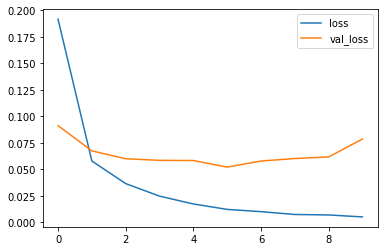

In [33]:
metrics[["loss","val_loss"]].plot()

<AxesSubplot:>

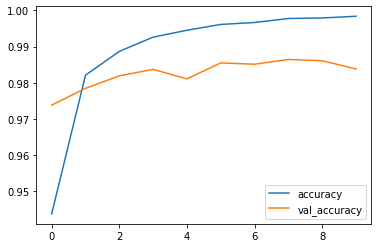

In [34]:
metrics[["accuracy","val_accuracy"]].plot()

In [35]:
model.metrics_names

['loss', 'accuracy']

In [36]:
model.evaluate(X_test,y_test,verbose=0)

[0.07859460264444351, 0.9838095307350159]

In [37]:
preds = model.predict(X_test)

In [38]:
preds

array([[1.17454078e-15, 1.88444264e-16, 1.04599031e-22, ...,
        1.16949905e-20, 5.29802591e-10, 2.12970787e-12],
       [1.00000000e+00, 3.56580203e-15, 1.61989533e-10, ...,
        8.01508992e-14, 7.26821424e-12, 6.25249592e-12],
       [4.63553405e-17, 1.36049670e-15, 1.00000000e+00, ...,
        2.17585699e-10, 4.58009221e-11, 7.69210058e-18],
       ...,
       [3.45160132e-14, 5.76222625e-10, 5.73438554e-11, ...,
        8.12781309e-09, 9.98573899e-01, 3.50686310e-06],
       [9.19182197e-15, 2.59113675e-10, 6.13834118e-07, ...,
        9.99999046e-01, 2.82369549e-12, 3.05116828e-07],
       [3.05934423e-13, 6.44428807e-16, 1.43264692e-10, ...,
        3.01421295e-07, 2.36267650e-09, 9.99963045e-01]], dtype=float32)

In [39]:
preds = preds.astype('int32')

In [40]:
preds

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [41]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [42]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.58      0.73       845
           1       1.00      0.38      0.55       920
           2       1.00      0.38      0.56       801
           3       1.00      0.56      0.72       823
           4       1.00      0.63      0.77       795
           5       1.00      0.60      0.75       807
           6       1.00      0.60      0.75       840
           7       1.00      0.26      0.41       869
           8       1.00      0.59      0.74       843
           9       1.00      0.25      0.40       857

   micro avg       1.00      0.48      0.65      8400
   macro avg       1.00      0.48      0.64      8400
weighted avg       1.00      0.48      0.64      8400
 samples avg       0.48      0.48      0.48      8400



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
model_score = model.evaluate(X_test, y_test, verbose=0)
print('validation loss:', model_score[0])
print('validation accuracy:', model_score[1])

validation loss: 0.07859460264444351
validation accuracy: 0.9838095307350159


# Test data

In [44]:
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_data.shape

(28000, 784)

In [45]:
test_data = test_data / 255

In [46]:
test_data = test_data.values.reshape( -1 , 28 , 28 , 1)

In [47]:
test_data.shape

(28000, 28, 28, 1)

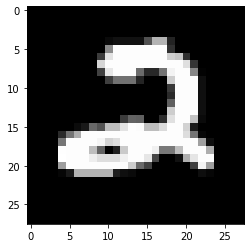

In [48]:
plt.imshow(test_data[0],cmap='gray')

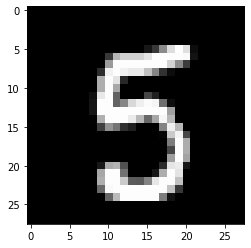

In [49]:
plt.imshow(test_data[10],cmap='gray')

In [50]:
test_preds = model.predict(test_data)

In [51]:
test_preds

array([[1.36895334e-12, 1.30930938e-13, 1.00000000e+00, ...,
        1.47491654e-11, 1.90133260e-08, 7.55282614e-10],
       [9.99999881e-01, 7.77216257e-15, 1.72404790e-09, ...,
        8.23188132e-12, 5.24578070e-09, 7.12328108e-09],
       [1.66490457e-18, 9.91685236e-14, 8.58289495e-10, ...,
        4.17038448e-09, 8.58792204e-10, 9.99999881e-01],
       ...,
       [3.48014311e-24, 3.15640877e-19, 1.17952672e-19, ...,
        1.32271673e-19, 1.95054705e-15, 1.03260675e-13],
       [6.18120084e-13, 7.48695387e-15, 4.94648430e-13, ...,
        1.46808801e-10, 2.11954551e-10, 9.99997497e-01],
       [2.40600288e-17, 4.96232717e-16, 1.00000000e+00, ...,
        6.43610599e-14, 8.06033640e-09, 1.52774963e-11]], dtype=float32)

In [52]:
test_preds.shape

(28000, 10)

#### preds contains the predicted labels of the digits .¶
#### argmax(axis = 1) is converting the one hot encoder back to the labels along the row axis

In [53]:
preds = np.argmax(test_preds , axis = 1)
test_image_id = range( 1 , len(preds)+1 )

In [54]:
preds

array([2, 0, 9, ..., 3, 9, 2])

In [55]:
len(test_image_id)


28000

In [56]:
submit_df = {"Id" : test_image_id , "Label" : preds }
submit_df = pd.DataFrame(submit_df)

In [57]:
submit_df.head()

,Id,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [58]:
submit_df.to_csv('submission.csv',index=False) 

#### Reading link
#### https://github.com/deadskull7/MNIST-digit-recognition-and-classification-using-CNN-with-Keras-99.70/blob/master/MNIST%20digit%20recognition%20%5B0.9932%5D.ipynb

# CNN Model2

In [59]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(28,28,1),)) # 32 filters and each filter is 3 by 3
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [60]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/10
263/263 [==============================] - 5s 18ms/step - loss: 0.2957 - accuracy: 0.9107 - val_loss: 0.1400 - val_accuracy: 0.9596
Epoch 2/10
263/263 [==============================] - 5s 20ms/step - loss: 0.0855 - accuracy: 0.9746 - val_loss: 0.0802 - val_accuracy: 0.9739
Epoch 3/10
263/263 [==============================] - 5s 17ms/step - loss: 0.0527 - accuracy: 0.9840 - val_loss: 0.0807 - val_accuracy: 0.9748
Epoch 4/10
263/263 [==============================] - 5s 17ms/step - loss: 0.0371 - accuracy: 0.9885 - val_loss: 0.0737 - val_accuracy: 0.9773
Epoch 5/10
263/263 [==============================] - 5s 17ms/step - loss: 0.0262 - accuracy: 0.9923 - val_loss: 0.0568 - val_accuracy: 0.9826
Epoch 6/10
263/263 [==============================] - 5s 18ms/step - loss: 0.0179 - accuracy: 0.9949 - val_loss: 0.0623 - val_accuracy: 0.9826
Epoch 7/10
263/263 [==============================] - 5s 18ms/step - loss: 0.0129 - accuracy: 0.9964 - val_loss: 0.0660 - val_accuracy: 0.9826

In [63]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

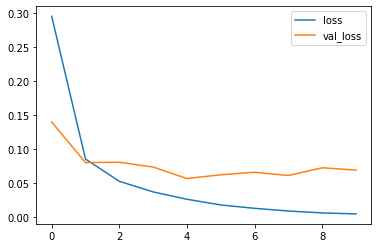

In [64]:
metrics[["loss","val_loss"]].plot()

<AxesSubplot:>

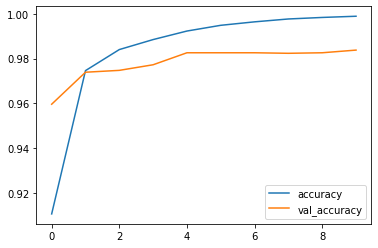

In [65]:
metrics[["accuracy","val_accuracy"]].plot()

In [66]:
preds = model.predict(X_test)
preds=preds.astype('int32')

In [67]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78       845
           1       1.00      0.38      0.56       920
           2       1.00      0.51      0.68       801
           3       1.00      0.57      0.73       823
           4       1.00      0.53      0.69       795
           5       1.00      0.45      0.62       807
           6       1.00      0.56      0.72       840
           7       1.00      0.28      0.44       869
           8       1.00      0.29      0.45       843
           9       1.00      0.19      0.33       857

   micro avg       1.00      0.44      0.61      8400
   macro avg       1.00      0.44      0.60      8400
weighted avg       1.00      0.44      0.60      8400
 samples avg       0.44      0.44      0.44      8400



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
test_preds = model.predict(test_data)

In [69]:
test_preds

array([[1.3199819e-12, 1.0146076e-18, 1.0000000e+00, ..., 2.6104730e-12,
        5.3496216e-13, 2.1050505e-14],
       [1.0000000e+00, 4.8335678e-14, 2.3698393e-10, ..., 6.4839474e-11,
        1.1355567e-11, 1.5457958e-12],
       [7.0778968e-14, 1.0973177e-12, 4.7778940e-07, ..., 9.0303676e-10,
        2.2132168e-08, 9.9999845e-01],
       ...,
       [2.9853895e-24, 1.4913588e-17, 2.2383859e-16, ..., 1.2173463e-17,
        1.8626804e-12, 1.8016644e-11],
       [1.6291004e-12, 3.3718785e-15, 3.5325617e-10, ..., 8.0838367e-09,
        4.2574864e-09, 9.9998927e-01],
       [4.3474095e-14, 6.2548947e-19, 1.0000000e+00, ..., 5.1427330e-15,
        7.9849773e-12, 5.7462586e-14]], dtype=float32)

In [70]:
test_preds.shape

(28000, 10)

In [71]:
preds = np.argmax(test_preds , axis = 1)
test_image_id = range( 1 , len(preds)+1 )
preds

array([2, 0, 9, ..., 3, 9, 2])

In [72]:
len(test_image_id)

28000

In [73]:
submission = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [74]:
submit_df = {"ImageId" : test_image_id , "Label" : preds }
submit_df = pd.DataFrame(submit_df)

In [75]:
submit_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [76]:
submit_df.to_csv('submission.csv',index=False) # 0.98375

# CNN Model3 

In [77]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [78]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [80]:
model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/10
263/263 [==============================] - 9s 32ms/step - loss: 0.2783 - accuracy: 0.9158 - val_loss: 0.1022 - val_accuracy: 0.9686
Epoch 2/10
263/263 [==============================] - 8s 31ms/step - loss: 0.0703 - accuracy: 0.9783 - val_loss: 0.0599 - val_accuracy: 0.9817
Epoch 3/10
263/263 [==============================] - 8s 31ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.0460 - val_accuracy: 0.9850
Epoch 4/10
263/263 [==============================] - 9s 34ms/step - loss: 0.0315 - accuracy: 0.9898 - val_loss: 0.0633 - val_accuracy: 0.9804
Epoch 5/10
263/263 [==============================] - 8s 31ms/step - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.0474 - val_accuracy: 0.9856
Epoch 6/10
263/263 [==============================] - 8s 31ms/step - loss: 0.0188 - accuracy: 0.9942 - val_loss: 0.0454 - val_accuracy: 0.9858
Epoch 7/10
263/263 [==============================] - 8s 31ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.0463 - val_accuracy: 0.9868

In [81]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

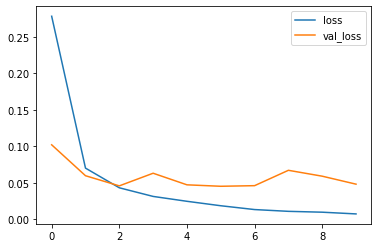

In [82]:
metrics[["loss","val_loss"]].plot() # by second epoch validation loss came down then going up and down and up which is sign of overfitting

<AxesSubplot:>

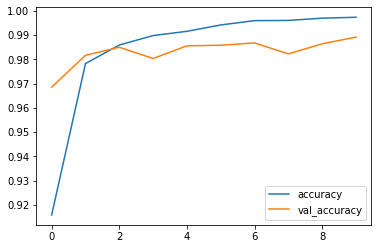

In [83]:
metrics[["accuracy","val_accuracy"]].plot() # similarly accuracy increased then by 5th epoch the accuracy increased then going down and up

In [84]:
preds = model.predict(X_test)
preds=preds.astype('int32')

In [85]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74       845
           1       1.00      0.70      0.83       920
           2       1.00      0.70      0.82       801
           3       1.00      0.57      0.73       823
           4       1.00      0.58      0.73       795
           5       1.00      0.60      0.75       807
           6       1.00      0.69      0.82       840
           7       1.00      0.51      0.67       869
           8       1.00      0.58      0.74       843
           9       1.00      0.21      0.35       857

   micro avg       1.00      0.57      0.73      8400
   macro avg       1.00      0.57      0.72      8400
weighted avg       1.00      0.57      0.72      8400
 samples avg       0.57      0.57      0.57      8400



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
test_preds = model.predict(test_data)
test_preds

array([[5.5654195e-14, 4.2864793e-18, 1.0000000e+00, ..., 2.3183498e-13,
        5.1788044e-13, 2.8682273e-18],
       [1.0000000e+00, 1.0654572e-15, 2.8610088e-11, ..., 7.0063282e-11,
        2.5171908e-11, 1.1264474e-10],
       [2.3334502e-14, 2.3150904e-12, 1.2056505e-08, ..., 5.4021093e-10,
        1.2239002e-06, 9.9999642e-01],
       ...,
       [9.7665920e-25, 1.0693458e-15, 7.3015944e-18, ..., 4.5423063e-16,
        7.7550786e-14, 1.8180205e-14],
       [1.4198945e-13, 1.4241202e-13, 4.2288767e-14, ..., 3.4085176e-08,
        6.1462124e-10, 9.9999940e-01],
       [1.6762179e-16, 5.9796807e-17, 1.0000000e+00, ..., 6.5093618e-15,
        2.1291374e-10, 2.4544773e-17]], dtype=float32)

In [87]:
test_preds.shape

(28000, 10)

In [88]:
preds = np.argmax(test_preds , axis = 1)
test_image_id = range( 1 , len(preds)+1 )
preds

array([2, 0, 9, ..., 3, 9, 2])

In [89]:
len(test_image_id)

28000

In [90]:
submit_df = {"ImageId" : test_image_id , "Label" : preds }
submit_df = pd.DataFrame(submit_df)

In [91]:
submit_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [92]:
submit_df.to_csv('submission.csv',index=False) # 0.98642 stacking multiple convolutional layers didnot increase the accuracy tremendously.

# Hyperparameter tuning with Optuna

In [93]:
# objective function

def objective(trial):

    # Keras Sequential model.
    model = Sequential()

    # Convolutional layers.

    # the number of convolution layers
    n_conv_layers = trial.suggest_int('n_conv_layers', 1, 3)

    for i in range(n_conv_layers):
        
        # sample different filters, kernels, stride for each convolutional layer

        model.add(Conv2D(
            filters=trial.suggest_categorical('filters_{}'.format(i), [16, 32, 64]),
            kernel_size=trial.suggest_categorical('kernel_size{}'.format(i), [3, 5]),
            strides=trial.suggest_categorical('strides{}'.format(i), [1, 2]),
            activation='relu',
            padding='same',
        ))

    # Max Pooling
    model.add(MaxPool2D(pool_size=2, strides=2))

    # Flattening for the dense layer
    model.add(Flatten())

    # fully-connected Dense layers.
    # The number of layers is a hyper-parameter we want to optimize.

    n_dense_layers = trial.suggest_int('n_dense_layers', 1, 3)

    for i in range(n_dense_layers):

        # we want to optimize the number of nodes (neurons) and the activation function.
        model.add(Dense(
            units=trial.suggest_int('units{}'.format(i), 5, 512),
            activation=trial.suggest_categorical(
                'activation{}'.format(i), ['relu', 'tanh']),
        ))

    # the softmax layer for classification
    model.add(Dense(10, activation='softmax'))

    # the optimizer 
    optimizer_name = trial.suggest_categorical(
        'optimizer_name', ['Adam', 'RMSprop'])

    if optimizer_name == 'Adam':
        optimizer = Adam(learning_rate=trial.suggest_float('learning_rate',  1e-6, 1e-2))
    else:
        optimizer = RMSprop(
            learning_rate=trial.suggest_float('learning_rate',  1e-6, 1e-2),
            momentum=trial.suggest_float('momentum',  0.1, 0.9),
        )

    # In Keras we need to compile the model so it can be trained.
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # model training
    history = model.fit(
        x=X_train,
        y=y_train,
        epochs=5,
        batch_size=128,
        validation_split=0.1,
    )

    # Get the classification accuracy on the validation-set
    # after the last training-epoch.
    accuracy = history.history['val_accuracy'][-1]

    return accuracy

In [94]:
study = optuna.create_study(
    direction='maximize'
)

study.optimize(objective, n_trials=10)

[I 2021-11-25 03:09:17,295] A new study created in memory with name: no-name-29ce3be5-e7cb-4c49-9f94-298ba3d317f9


Epoch 1/5
237/237 [==============================] - 35s 146ms/step - loss: 4.2918 - accuracy: 0.1073 - val_loss: 2.3038 - val_accuracy: 0.1107
Epoch 2/5
237/237 [==============================] - 34s 144ms/step - loss: 2.3034 - accuracy: 0.1075 - val_loss: 2.3008 - val_accuracy: 0.1137
Epoch 3/5
237/237 [==============================] - 34s 145ms/step - loss: 2.3034 - accuracy: 0.1079 - val_loss: 2.3036 - val_accuracy: 0.0958
Epoch 4/5
237/237 [==============================] - 34s 145ms/step - loss: 2.3032 - accuracy: 0.1086 - val_loss: 2.3028 - val_accuracy: 0.1107
Epoch 5/5
237/237 [==============================] - 34s 145ms/step - loss: 2.3029 - accuracy: 0.1103 - val_loss: 2.3023 - val_accuracy: 0.1107


[I 2021-11-25 03:12:09,759] Trial 0 finished with value: 0.11071428656578064 and parameters: {'n_conv_layers': 2, 'filters_0': 64, 'kernel_size0': 3, 'strides0': 1, 'filters_1': 16, 'kernel_size1': 5, 'strides1': 1, 'n_dense_layers': 2, 'units0': 345, 'activation0': 'tanh', 'units1': 309, 'activation1': 'relu', 'optimizer_name': 'RMSprop', 'learning_rate': 0.007233468368693003, 'momentum': 0.8052212498330342}. Best is trial 0 with value: 0.11071428656578064.


Epoch 1/5
237/237 [==============================] - 2s 8ms/step - loss: 0.3642 - accuracy: 0.8862 - val_loss: 0.2338 - val_accuracy: 0.9393
Epoch 2/5
237/237 [==============================] - 2s 8ms/step - loss: 0.1609 - accuracy: 0.9528 - val_loss: 0.1457 - val_accuracy: 0.9533
Epoch 3/5
237/237 [==============================] - 2s 10ms/step - loss: 0.1305 - accuracy: 0.9636 - val_loss: 0.1385 - val_accuracy: 0.9589
Epoch 4/5
237/237 [==============================] - 2s 8ms/step - loss: 0.1117 - accuracy: 0.9684 - val_loss: 0.1952 - val_accuracy: 0.9467
Epoch 5/5
237/237 [==============================] - 2s 8ms/step - loss: 0.1016 - accuracy: 0.9717 - val_loss: 0.1246 - val_accuracy: 0.9661


[I 2021-11-25 03:12:20,399] Trial 1 finished with value: 0.9660714268684387 and parameters: {'n_conv_layers': 2, 'filters_0': 16, 'kernel_size0': 3, 'strides0': 2, 'filters_1': 16, 'kernel_size1': 5, 'strides1': 2, 'n_dense_layers': 1, 'units0': 399, 'activation0': 'tanh', 'optimizer_name': 'RMSprop', 'learning_rate': 0.009077070622069694, 'momentum': 0.22543842203185305}. Best is trial 1 with value: 0.9660714268684387.


Epoch 1/5
237/237 [==============================] - 5s 17ms/step - loss: 0.2284 - accuracy: 0.9340 - val_loss: 0.0800 - val_accuracy: 0.9765
Epoch 2/5
237/237 [==============================] - 4s 16ms/step - loss: 0.0567 - accuracy: 0.9816 - val_loss: 0.1151 - val_accuracy: 0.9688
Epoch 3/5
237/237 [==============================] - 4s 18ms/step - loss: 0.0318 - accuracy: 0.9890 - val_loss: 0.0751 - val_accuracy: 0.9777
Epoch 4/5
237/237 [==============================] - 4s 17ms/step - loss: 0.0236 - accuracy: 0.9919 - val_loss: 0.0935 - val_accuracy: 0.9777
Epoch 5/5
237/237 [==============================] - 4s 17ms/step - loss: 0.0194 - accuracy: 0.9934 - val_loss: 0.1084 - val_accuracy: 0.9801


[I 2021-11-25 03:12:41,342] Trial 2 finished with value: 0.9800595045089722 and parameters: {'n_conv_layers': 1, 'filters_0': 16, 'kernel_size0': 3, 'strides0': 1, 'n_dense_layers': 1, 'units0': 404, 'activation0': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 0.009602632579376548}. Best is trial 2 with value: 0.9800595045089722.


Epoch 1/5
237/237 [==============================] - 8s 31ms/step - loss: 5.0481 - accuracy: 0.1013 - val_loss: 4.5882 - val_accuracy: 0.1107
Epoch 2/5
237/237 [==============================] - 7s 28ms/step - loss: 4.7138 - accuracy: 0.1028 - val_loss: 4.6906 - val_accuracy: 0.0994
Epoch 3/5
237/237 [==============================] - 7s 28ms/step - loss: 4.7898 - accuracy: 0.1001 - val_loss: 5.7349 - val_accuracy: 0.1107
Epoch 4/5
237/237 [==============================] - 7s 31ms/step - loss: 4.7639 - accuracy: 0.0998 - val_loss: 5.3358 - val_accuracy: 0.0991
Epoch 5/5
237/237 [==============================] - 7s 28ms/step - loss: 4.7515 - accuracy: 0.1026 - val_loss: 4.7059 - val_accuracy: 0.1137


[I 2021-11-25 03:13:16,618] Trial 3 finished with value: 0.11369047313928604 and parameters: {'n_conv_layers': 2, 'filters_0': 16, 'kernel_size0': 3, 'strides0': 2, 'filters_1': 64, 'kernel_size1': 3, 'strides1': 1, 'n_dense_layers': 3, 'units0': 234, 'activation0': 'tanh', 'units1': 177, 'activation1': 'relu', 'units2': 482, 'activation2': 'tanh', 'optimizer_name': 'RMSprop', 'learning_rate': 0.009453176475231221, 'momentum': 0.10785470806417452}. Best is trial 2 with value: 0.9800595045089722.


Epoch 1/5
237/237 [==============================] - 8s 31ms/step - loss: 4.8751 - accuracy: 0.2465 - val_loss: 4.0720 - val_accuracy: 0.3134
Epoch 2/5
237/237 [==============================] - 6s 27ms/step - loss: 2.2488 - accuracy: 0.4727 - val_loss: 2.9362 - val_accuracy: 0.4780
Epoch 3/5
237/237 [==============================] - 7s 28ms/step - loss: 1.7044 - accuracy: 0.6168 - val_loss: 1.5235 - val_accuracy: 0.5955
Epoch 4/5
237/237 [==============================] - 8s 32ms/step - loss: 1.5959 - accuracy: 0.6337 - val_loss: 1.5174 - val_accuracy: 0.6842
Epoch 5/5
237/237 [==============================] - 7s 30ms/step - loss: 1.3905 - accuracy: 0.6840 - val_loss: 1.0932 - val_accuracy: 0.7426


[I 2021-11-25 03:13:52,347] Trial 4 finished with value: 0.742559552192688 and parameters: {'n_conv_layers': 2, 'filters_0': 16, 'kernel_size0': 5, 'strides0': 1, 'filters_1': 32, 'kernel_size1': 5, 'strides1': 2, 'n_dense_layers': 2, 'units0': 109, 'activation0': 'tanh', 'units1': 465, 'activation1': 'tanh', 'optimizer_name': 'RMSprop', 'learning_rate': 0.008425681096535827, 'momentum': 0.656472149229469}. Best is trial 2 with value: 0.9800595045089722.


Epoch 1/5
237/237 [==============================] - 5s 20ms/step - loss: 0.2001 - accuracy: 0.9403 - val_loss: 0.0946 - val_accuracy: 0.9717
Epoch 2/5
237/237 [==============================] - 5s 19ms/step - loss: 0.0563 - accuracy: 0.9820 - val_loss: 0.0778 - val_accuracy: 0.9780
Epoch 3/5
237/237 [==============================] - 5s 20ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0857 - val_accuracy: 0.9750
Epoch 4/5
237/237 [==============================] - 5s 20ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.0867 - val_accuracy: 0.9807
Epoch 5/5
237/237 [==============================] - 5s 22ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.1251 - val_accuracy: 0.9762


[I 2021-11-25 03:14:17,000] Trial 5 finished with value: 0.976190447807312 and parameters: {'n_conv_layers': 1, 'filters_0': 16, 'kernel_size0': 5, 'strides0': 1, 'n_dense_layers': 1, 'units0': 472, 'activation0': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 0.009018492498218816}. Best is trial 2 with value: 0.9800595045089722.


Epoch 1/5
237/237 [==============================] - 23s 94ms/step - loss: 0.6157 - accuracy: 0.7914 - val_loss: 0.3062 - val_accuracy: 0.9033
Epoch 2/5
237/237 [==============================] - 24s 100ms/step - loss: 0.2283 - accuracy: 0.9305 - val_loss: 0.2166 - val_accuracy: 0.9360
Epoch 3/5
237/237 [==============================] - 23s 98ms/step - loss: 0.1976 - accuracy: 0.9387 - val_loss: 0.2451 - val_accuracy: 0.9259
Epoch 4/5
237/237 [==============================] - 22s 91ms/step - loss: 0.1781 - accuracy: 0.9474 - val_loss: 0.1942 - val_accuracy: 0.9399
Epoch 5/5
237/237 [==============================] - 23s 99ms/step - loss: 0.1746 - accuracy: 0.9478 - val_loss: 0.1886 - val_accuracy: 0.9429


[I 2021-11-25 03:16:12,085] Trial 6 finished with value: 0.9428571462631226 and parameters: {'n_conv_layers': 3, 'filters_0': 64, 'kernel_size0': 5, 'strides0': 1, 'filters_1': 32, 'kernel_size1': 5, 'strides1': 2, 'filters_2': 16, 'kernel_size2': 5, 'strides2': 2, 'n_dense_layers': 3, 'units0': 446, 'activation0': 'tanh', 'units1': 123, 'activation1': 'relu', 'units2': 480, 'activation2': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 0.007837788159586941}. Best is trial 2 with value: 0.9800595045089722.


Epoch 1/5
237/237 [==============================] - 24s 101ms/step - loss: 1.2252 - accuracy: 0.6733 - val_loss: 0.2797 - val_accuracy: 0.9229
Epoch 2/5
237/237 [==============================] - 22s 93ms/step - loss: 0.1667 - accuracy: 0.9502 - val_loss: 0.1816 - val_accuracy: 0.9446
Epoch 3/5
237/237 [==============================] - 24s 102ms/step - loss: 0.1553 - accuracy: 0.9588 - val_loss: 0.2515 - val_accuracy: 0.9304
Epoch 4/5
237/237 [==============================] - 24s 102ms/step - loss: 0.1773 - accuracy: 0.9485 - val_loss: 0.2807 - val_accuracy: 0.9125
Epoch 5/5
237/237 [==============================] - 22s 93ms/step - loss: 0.2134 - accuracy: 0.9407 - val_loss: 0.1989 - val_accuracy: 0.9408


[I 2021-11-25 03:18:09,278] Trial 7 finished with value: 0.9407737851142883 and parameters: {'n_conv_layers': 3, 'filters_0': 64, 'kernel_size0': 5, 'strides0': 2, 'filters_1': 32, 'kernel_size1': 5, 'strides1': 1, 'filters_2': 64, 'kernel_size2': 3, 'strides2': 1, 'n_dense_layers': 1, 'units0': 259, 'activation0': 'tanh', 'optimizer_name': 'RMSprop', 'learning_rate': 0.009760723365197649, 'momentum': 0.15212099619330105}. Best is trial 2 with value: 0.9800595045089722.


Epoch 1/5
237/237 [==============================] - 6s 22ms/step - loss: 0.2147 - accuracy: 0.9316 - val_loss: 0.0912 - val_accuracy: 0.9696
Epoch 2/5
237/237 [==============================] - 5s 20ms/step - loss: 0.0611 - accuracy: 0.9809 - val_loss: 0.0965 - val_accuracy: 0.9750
Epoch 3/5
237/237 [==============================] - 5s 19ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0867 - val_accuracy: 0.9801
Epoch 4/5
237/237 [==============================] - 4s 18ms/step - loss: 0.0293 - accuracy: 0.9899 - val_loss: 0.0931 - val_accuracy: 0.9756
Epoch 5/5
237/237 [==============================] - 4s 19ms/step - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.1187 - val_accuracy: 0.9741


[I 2021-11-25 03:18:33,306] Trial 8 finished with value: 0.9741071462631226 and parameters: {'n_conv_layers': 1, 'filters_0': 16, 'kernel_size0': 3, 'strides0': 1, 'n_dense_layers': 3, 'units0': 421, 'activation0': 'relu', 'units1': 113, 'activation1': 'tanh', 'units2': 228, 'activation2': 'relu', 'optimizer_name': 'Adam', 'learning_rate': 0.0036497288940476385}. Best is trial 2 with value: 0.9800595045089722.


Epoch 1/5
237/237 [==============================] - 12s 49ms/step - loss: 0.5069 - accuracy: 0.8747 - val_loss: 0.2842 - val_accuracy: 0.9312
Epoch 2/5
237/237 [==============================] - 12s 52ms/step - loss: 0.3234 - accuracy: 0.9327 - val_loss: 0.3584 - val_accuracy: 0.9384
Epoch 3/5
237/237 [==============================] - 11s 47ms/step - loss: 0.3010 - accuracy: 0.9438 - val_loss: 0.4201 - val_accuracy: 0.9342
Epoch 4/5
237/237 [==============================] - 11s 48ms/step - loss: 0.3035 - accuracy: 0.9477 - val_loss: 0.5071 - val_accuracy: 0.9220
Epoch 5/5
237/237 [==============================] - 12s 51ms/step - loss: 0.3231 - accuracy: 0.9452 - val_loss: 0.3897 - val_accuracy: 0.9357


[I 2021-11-25 03:19:32,452] Trial 9 finished with value: 0.9357143044471741 and parameters: {'n_conv_layers': 1, 'filters_0': 64, 'kernel_size0': 3, 'strides0': 1, 'n_dense_layers': 1, 'units0': 239, 'activation0': 'tanh', 'optimizer_name': 'RMSprop', 'learning_rate': 0.006964720368015701, 'momentum': 0.8375698560518268}. Best is trial 2 with value: 0.9800595045089722.


In [95]:
study.best_params

{'n_conv_layers': 1,
 'filters_0': 16,
 'kernel_size0': 3,
 'strides0': 1,
 'n_dense_layers': 1,
 'units0': 404,
 'activation0': 'relu',
 'optimizer_name': 'Adam',
 'learning_rate': 0.009602632579376548}

In [96]:
study.best_value

0.9800595045089722

In [97]:
#Sequential API
model = Sequential()
#Convolutional layer
model.add(Conv2D(filters=16,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
#Convolutional layer
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())    
model.add(Dense(242,activation='relu'))
model.add(Dense(27,activation='tanh'))
#output layer multiclass hence softmax layer
model.add(Dense(10,activation='softmax'))

In [98]:
opt = Adam(learning_rate=0.004618995519239905)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 9, 9, 32)          12832     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 242)               124146    
_________________________________________________________________
dense_35 (Dense)             (None, 27)              

In [100]:
model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/10
263/263 [==============================] - 5s 18ms/step - loss: 0.2340 - accuracy: 0.9318 - val_loss: 0.0762 - val_accuracy: 0.9771
Epoch 2/10
263/263 [==============================] - 4s 17ms/step - loss: 0.0595 - accuracy: 0.9826 - val_loss: 0.0604 - val_accuracy: 0.9818
Epoch 3/10
263/263 [==============================] - 4s 17ms/step - loss: 0.0422 - accuracy: 0.9867 - val_loss: 0.0614 - val_accuracy: 0.9833
Epoch 4/10
263/263 [==============================] - 4s 17ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.0491 - val_accuracy: 0.9867
Epoch 5/10
263/263 [==============================] - 4s 17ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0524 - val_accuracy: 0.9858
Epoch 6/10
263/263 [==============================] - 5s 19ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0671 - val_accuracy: 0.9815
Epoch 7/10
263/263 [==============================] - 5s 18ms/step - loss: 0.0178 - accuracy: 0.9945 - val_loss: 0.0549 - val_accuracy: 0.9857

In [101]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

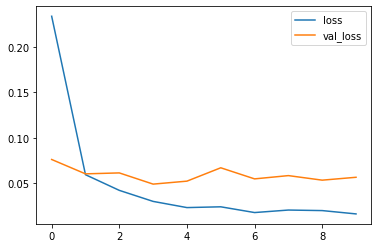

In [102]:
metrics[["loss","val_loss"]].plot() # by second epoch validation loss came down then going up and down and up which is sign of overfitting

<AxesSubplot:>

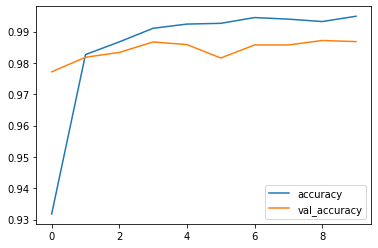

In [103]:
metrics[["accuracy","val_accuracy"]].plot() # similarly accuracy increased then by 5th epoch the accuracy increased then going down and up

In [104]:
preds = model.predict(X_test)
preds

array([[5.0710291e-06, 7.8291550e-06, 1.5202042e-07, ..., 6.2003420e-07,
        4.6676363e-05, 3.0015024e-05],
       [9.9990082e-01, 1.2242782e-06, 1.5415615e-05, ..., 8.1197516e-07,
        2.1819280e-05, 2.4387429e-05],
       [2.3234027e-04, 6.4197688e-05, 9.9848866e-01, ..., 1.5071998e-04,
        4.4260299e-04, 1.2980929e-05],
       ...,
       [3.6603225e-05, 1.3757825e-06, 5.9128128e-05, ..., 1.7157523e-06,
        9.9892741e-01, 7.1753369e-05],
       [6.0790802e-07, 8.0529162e-06, 1.6429587e-04, ..., 9.9970883e-01,
        9.7681414e-07, 6.4958986e-05],
       [1.3840367e-05, 2.5362490e-06, 1.5739686e-06, ..., 5.5113353e-05,
        1.3431012e-04, 9.9887377e-01]], dtype=float32)

In [105]:
preds.shape

(8400, 10)

In [106]:
preds = np.argmax(preds , axis = 1)
preds

array([5, 0, 2, ..., 8, 7, 9])

In [107]:
preds.shape

(8400,)

In [108]:
y_test = np.argmax(y_test , axis = 1)
y_test

array([5, 0, 2, ..., 8, 7, 9])

In [109]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       845
           1       1.00      0.98      0.99       920
           2       0.97      0.99      0.98       801
           3       1.00      0.98      0.99       823
           4       0.98      0.98      0.98       795
           5       0.99      0.99      0.99       807
           6       0.99      0.99      0.99       840
           7       0.98      0.99      0.98       869
           8       0.98      0.99      0.98       843
           9       0.98      0.98      0.98       857

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



In [110]:
test_preds = model.predict(test_data)
test_preds

array([[2.5193083e-05, 1.1309718e-05, 9.9951613e-01, ..., 2.8315162e-05,
        5.3871325e-05, 7.1808495e-06],
       [9.9962056e-01, 2.0896002e-06, 1.2859560e-05, ..., 3.8678823e-07,
        9.9116056e-05, 1.0221129e-05],
       [1.2896892e-06, 1.2322166e-06, 2.1418241e-06, ..., 2.3889957e-05,
        8.1481575e-04, 9.9871266e-01],
       ...,
       [1.2550701e-05, 2.3497492e-05, 4.9193145e-06, ..., 3.2840810e-06,
        1.1935400e-06, 9.5715870e-07],
       [1.0760879e-05, 1.4713493e-06, 1.7545974e-06, ..., 6.6694447e-05,
        4.2168249e-05, 9.9932504e-01],
       [5.8546728e-05, 2.0304127e-05, 9.9934906e-01, ..., 6.8056994e-05,
        2.2759581e-04, 5.2737551e-06]], dtype=float32)

In [111]:
test_preds.shape

(28000, 10)

In [112]:
preds = np.argmax(test_preds , axis = 1)
test_image_id = range( 1 , len(preds)+1 )
preds

array([2, 0, 9, ..., 3, 9, 2])

In [113]:
len(test_image_id)

28000

In [114]:
submit_df = {"ImageId" : test_image_id , "Label" : preds }
submit_df = pd.DataFrame(submit_df)

In [115]:
submit_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [116]:
submit_df.to_csv('submission.csv',index=False) # 0.98607

#### Reading refrence .... Hyperoptimization Udemy